In [1]:
#download data
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'

In [2]:
#normalize dataset
from keras.datasets import mnist #28x28
from keras.utils import np_utils
# Load dataset as train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# Set numeric type to float32 from uint8
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255
# Transform lables to one-hot encoding
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
# Reshape the dataset into 4D array
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)

Using TensorFlow backend.


In [3]:
#defining LeNet-5 Model
from keras.models import Sequential
from keras import models, layers
import keras
#initiate empty model
model = Sequential()
# C1 Convolutional Layer
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation="tanh", input_shape=(28,28,1), padding="same"))
# S2 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1, 1), padding="valid"))
# C3 Convolutional Layer
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid"))
# S4 Pooling Layer
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
# C5 Fully Connected Convolutional Layer 
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1, 1), activation="tanh", padding="valid"))
#Flatten the CNN output 
model.add(layers.Flatten())
# FC6 Fully Connected Layer
#Output layer with tanh activation
model.add(layers.Dense(84, activation="tanh"))
#Output Layer with softmax activation
model.add(layers.Dense(10, activation="softmax"))
#Model COmpile
model.compile(loss=keras.losses.categorical_crossentropy, optimizer="SGD", metrics=["accuracy"])

In [4]:
#model Training and Fit
hist = model.fit(x=X_train,y=Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test), verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.6644 - accuracy: 0.8349 - val_loss: 0.3320 - val_accuracy: 0.9083
Epoch 2/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.3011 - accuracy: 0.9154 - val_loss: 0.2529 - val_accuracy: 0.9261
Epoch 3/10
60000/60000 [==============================] - 4s 75us/step - loss: 0.2418 - accuracy: 0.9313 - val_loss: 0.2104 - val_accuracy: 0.9387
Epoch 4/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.2067 - accuracy: 0.9408 - val_loss: 0.1829 - val_accuracy: 0.9480
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.1822 - accuracy: 0.9478 - val_loss: 0.1640 - val_accuracy: 0.9523
Epoch 6/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.1633 - accuracy: 0.9537 - val_loss: 0.1503 - val_accuracy: 0.9569
Epoch 7/10
60000/60000 [==============================] - 4s 69us/st

In [5]:
#Evaluating Model and model keys
Score = model.evaluate(X_test, Y_test)
print("Loss{:.4f},Accuracy{:.2f}%".format(Score[0], Score[1] * 100))
print(hist.history.keys())

10000/10000 [==============================] - 1s 72us/step
Loss0.1113,Accuracy96.77%
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [6]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history["accuracy"], "o-")
ax.plot([None] + hist.history["val_accuracy"], "x-")
ax.legend(["Train Accuracy", "Validation Accuracy"], loc = 0)
ax.set_title("Training Accuracy and Validation Accuracy per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("acc")

Text(0, 0.5, 'acc')

Text(0, 0.5, 'Loss')

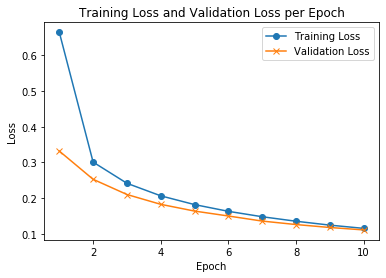

In [7]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
ax.plot([None] + hist.history["loss"], "o-")
ax.plot([None] + hist.history["val_loss"], "x-")
ax.legend(["Training Loss", "Validation Loss"], loc = 0)
ax.set_title("Training Loss and Validation Loss per Epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")